<a href="https://colab.research.google.com/github/jalaluddin5/flight-price-prediction/blob/main/flight_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset=pd.read_csv('/content/Clean_Dataset.csv')
dataset.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
dataset.drop(columns=['Unnamed: 0','flight'],inplace=True,errors='ignore')
dataset.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
X = dataset.drop('price', axis=1)
y = dataset['price']

In [6]:
print(X)

         airline source_city departure_time stops   arrival_time  \
0       SpiceJet       Delhi        Evening  zero          Night   
1       SpiceJet       Delhi  Early_Morning  zero        Morning   
2        AirAsia       Delhi  Early_Morning  zero  Early_Morning   
3        Vistara       Delhi        Morning  zero      Afternoon   
4        Vistara       Delhi        Morning  zero        Morning   
...          ...         ...            ...   ...            ...   
300148   Vistara     Chennai        Morning   one        Evening   
300149   Vistara     Chennai      Afternoon   one          Night   
300150   Vistara     Chennai  Early_Morning   one          Night   
300151   Vistara     Chennai  Early_Morning   one        Evening   
300152   Vistara     Chennai        Morning   one        Evening   

       destination_city     class  duration  days_left  
0                Mumbai   Economy      2.17          1  
1                Mumbai   Economy      2.33          1  
2           

In [7]:
print(y)

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64


In [8]:
dataset.nunique()

,0
airline,6
source_city,6
departure_time,6
stops,3
arrival_time,6
destination_city,6
class,2
duration,476
days_left,49
price,12157


In [9]:
dataset.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [10]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
le=LabelEncoder()
X['class'] = le.fit_transform(X['class'])

categorical_cols = ['airline','source_city','departure_time','stops','arrival_time','destination_city']

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first',sparse_output=False), categorical_cols)],
    remainder='passthrough'
)

X = ct.fit_transform(X)


In [11]:
print(X[9])

[0.   1.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   1.   0.   1.   0.   0.   0.   0.   0.   0.   0.   1.   1.
 2.25 1.  ]


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
print(X_train.shape)

(240122, 30)


In [14]:
print(X_test.shape)

(60031, 30)


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Random Forest Results:")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Random Forest Results:
MSE:  7900041.48
RMSE: 2810.70
R² Score: 0.9847


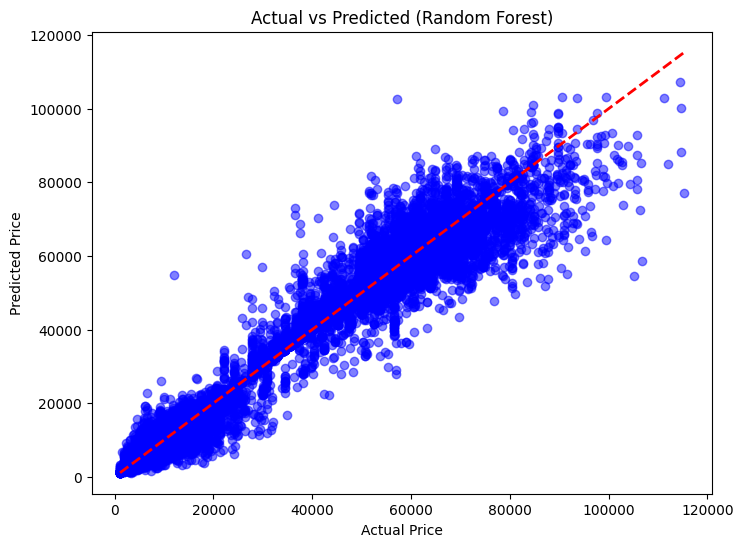

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted (Random Forest)")
plt.show()